# CIFAR100 的卷积神经网络训练

**这个训练的过程和cifar10差不多，数据集换成了cifar100.**  
**具体的流程我在cifar10的notebook里面有仔细介绍，可以参考。**  
**和cifar10不一样的部分我会具体介绍**


In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
%matplotlib inline

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR100(root='./data(100)', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data(100)', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)



Files already downloaded and verified
Files already downloaded and verified


**注意啦！两个数据集的class map不一样**

In [5]:
classes = trainset.classes
mapp = {v: k for k, v in trainset.class_to_idx.items()}

willow_tree   beaver   keyboard   spider


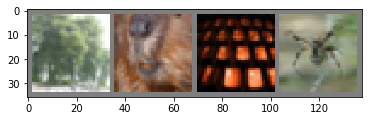

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

to_pil_image = transforms.ToPILImage()
cnt = 0
for images,label in trainloader:
    if cnt>=1:      # 只显示3张图片
        break
    # print(label)    # 显示label
    print('   '.join('%5s' % mapp[label[j].item()]for j in range(4)))
    imshow(torchvision.utils.make_grid(images))
    cnt += 1

In [7]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 100)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    
    def num_flat_features(self,x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *=s
        return  num_features

net = Net()

In [8]:
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=100, bias=True)
)


In [9]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 3, 5, 5])


In [10]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [12]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.341
[1,  4000] loss: 2.427
[1,  6000] loss: 2.445
[1,  8000] loss: 2.465
[1, 10000] loss: 2.535
[1, 12000] loss: 2.558
[2,  2000] loss: 2.249
[2,  4000] loss: 2.333
[2,  6000] loss: 2.386
[2,  8000] loss: 2.473
[2, 10000] loss: 2.474
[2, 12000] loss: 2.524
[3,  2000] loss: 2.207
[3,  4000] loss: 2.308
[3,  6000] loss: 2.349
[3,  8000] loss: 2.355
[3, 10000] loss: 2.420
[3, 12000] loss: 2.453
[4,  2000] loss: 2.169
[4,  4000] loss: 2.239
[4,  6000] loss: 2.290
[4,  8000] loss: 2.341
[4, 10000] loss: 2.371
[4, 12000] loss: 2.361
[5,  2000] loss: 2.149
[5,  4000] loss: 2.225
[5,  6000] loss: 2.260
[5,  8000] loss: 2.260
[5, 10000] loss: 2.353
[5, 12000] loss: 2.296
[6,  2000] loss: 2.051
[6,  4000] loss: 2.157
[6,  6000] loss: 2.210
[6,  8000] loss: 2.280
[6, 10000] loss: 2.281
[6, 12000] loss: 2.366
[7,  2000] loss: 2.009
[7,  4000] loss: 2.077
[7,  6000] loss: 2.164
[7,  8000] loss: 2.224
[7, 10000] loss: 2.272
[7, 12000] loss: 2.367
[8,  2000] loss: 1.986
[8,  4000] 

In [13]:
PATH = './cifar(100)_net.pth'
torch.save(net.state_dict(), PATH)

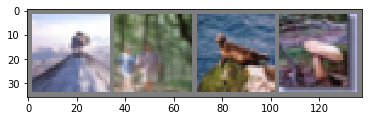

GroundTruth:  mountain forest  seal mushroom


In [14]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % mapp[labels[j].item()] for j in range(4)))

In [15]:
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [16]:
outputs = net(images)

In [17]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  rocket palm_tree dinosaur mouse


# 来看看结果

In [18]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 24 %


In [19]:
class_correct = list(0. for i in range(100))
class_total = list(0. for i in range(100))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(100):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of apple : 64 %
Accuracy of aquarium_fish : 25 %
Accuracy of  baby : 19 %
Accuracy of  bear : 12 %
Accuracy of beaver :  6 %
Accuracy of   bed : 22 %
Accuracy of   bee : 11 %
Accuracy of beetle : 27 %
Accuracy of bicycle : 29 %
Accuracy of bottle : 38 %
Accuracy of  bowl : 11 %
Accuracy of   boy : 13 %
Accuracy of bridge : 31 %
Accuracy of   bus :  6 %
Accuracy of butterfly : 23 %
Accuracy of camel : 19 %
Accuracy of   can : 23 %
Accuracy of castle : 46 %
Accuracy of caterpillar : 25 %
Accuracy of cattle : 14 %
Accuracy of chair : 57 %
Accuracy of chimpanzee : 33 %
Accuracy of clock : 15 %
Accuracy of cloud : 28 %
Accuracy of cockroach : 55 %
Accuracy of couch : 17 %
Accuracy of  crab : 16 %
Accuracy of crocodile : 21 %
Accuracy of   cup : 42 %
Accuracy of dinosaur : 33 %
Accuracy of dolphin : 26 %
Accuracy of elephant : 22 %
Accuracy of flatfish : 26 %
Accuracy of forest : 21 %
Accuracy of   fox : 34 %
Accuracy of  girl :  2 %
Accuracy of hamster : 22 %
Accuracy of house :  7

**不太行，得加强啦！**

# 看看计算设备

**如果你用了GPU计算，则会显示cuda:0**  
**否则会显示cpu**

In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu
